## Health Information Systems and Decision Support Systems
## WPO 2: Data-driven systems  (21/02/20)
***
*Jakub Ceranka, Pieter Boonen, Panagiotis Gonidakis, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

- <font color=blue>Niklaus Jeff Geisser Aguilar 0554142</font> </br>
- <font color=blue>Fernando Esteban Ramirez Barbosa 0562659</font> </br>

### Goal
The goal of this practical session is to get an insight into methods and algorithms for building knowledge-based decision-support systems. Your tasks will involve designing the systems, examining the output, tuning the parameters and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook via Canvas Assignment functionality (VUB) or Ufora Dropbox before the __5th of March, 2020, midnight__. The grade from this practical session will contribute to your final grade. Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be)

### Libraries

During this practical session, the following libraries will be used. You can use different version of libraries, however we recommend the following build:

- [__Scikit-fuzzy__](https://pypi.python.org/pypi/scikit-fuzzy): library for fuzzy sets and logic __V 0.3.1__ 
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform. __V 1.13.3__ 
- [__Graphviz__](https://pypi.python.org/pypi/graphviz):     Visualization of graphs. You may need to the perform installation via conda.  __V 0.8.2__ 
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python. __V 2.1.0__ 
- [__Pgmpy__](http://pgmpy.org/): Module for building and performing inference on probabilistic graphical models __V 0.2.1__ 


To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using __version__ command. Information on updating the libraries using Anaconda can be found  [here](http://conda-test.pydata.org/docs/examples/update.html).
<br><br>
If the library is not installed in your Anaconda Navigator or Python simply type in your terminal: *conda install package_name* or *pip install package_name*.

## Part 1: A fuzzy logic alert system at the pediatric ICU
At the intensive care unit of a pediatric hospital, the staff wants to implement a priority-based alert system that allows to rank the urgency of the different monitors of physiological signs of the infants. The physiological sensor outputs are combined with patient-specific information (age, history, etc,) to determine the urgency. The output of each monitor should be a value between 0 (no alert) and 100 (alert with the highest priority), allowing the output of all monitors to be ranked in terms of urgency. The responsible nurse is notified of the most urgent which needs to be addressed first. 

### Task 1: Design a monitor system for body temperature
The output of a temperature sensor should be combined with the (priorly given) age of the patient. The variables to consider are:

* Temperature
   - The temperature in degrees Celcius. 
       * Values of about 35,5 and below are `hypothermia`
       * Values of  roughly 37 are  `normal`
       * Values between roughly 37,5 and 38 are `elevated`
       * Values of around 38,5 indicate `mild fever`
       * Values of 39 and higher indicate `high fever`
       * Values outside of the range [30,44] are likely to indicate malfunctioning of the sensor
       
* Age
   - The age of the infant in months, from 0 to 36 
       * We make a distinction between newborns (0-3 months), babies (3-6 months), infants (6-12 months) and toddlers (12-36 months)

* Alert-level
   -  A value between 0 and 100
       * Five levels are distinguished: no alert, low, moderate, high, critical 


The behaviour of the monitoring system should be the following. 
    * For newborns, elevated temperature should give a moderate alert, a mild fever should correspond to a high alert, and a high fever should correspond to critical alert-level. 
    * Babies with a mild fever should give a moderate alarm, while high fever should be high alert. 
    * Infants with a mild fever should be a low priority alert, and high fever should be moderate alert. 
    * Toddlers with a mild and high fever both should give a low alert. 
    * Hypothermia should always give a high alert level, except for newborns where it should be critical.
    * Malfunctioning sensors should always give a moderate alert. 
The alert level should evolve continuously for ages and temperatures in the correct functioning range of the sensor, and have a logical progression for values not mentioned above. 

Use the packages *skfuzzy* and *matplotlib* to design and visualize a fuzzy logic controller. Instead of *%matplotlib inline* you can use *%matplotlib notebook*, which provide interactive plots.


### Step 1: Define and visualize the membership funtions
Use custom triangular and trapezoid membership functions for the temperature and age, and have at least 1 degree Celcius and 2 months of overlap between functions on each side, respectively. Ensure the total membership is always one. You can use an automatically generated membership function for the alert-level. Have a look at the examples for the syntax (http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html). 

<IPython.core.display.Javascript object>


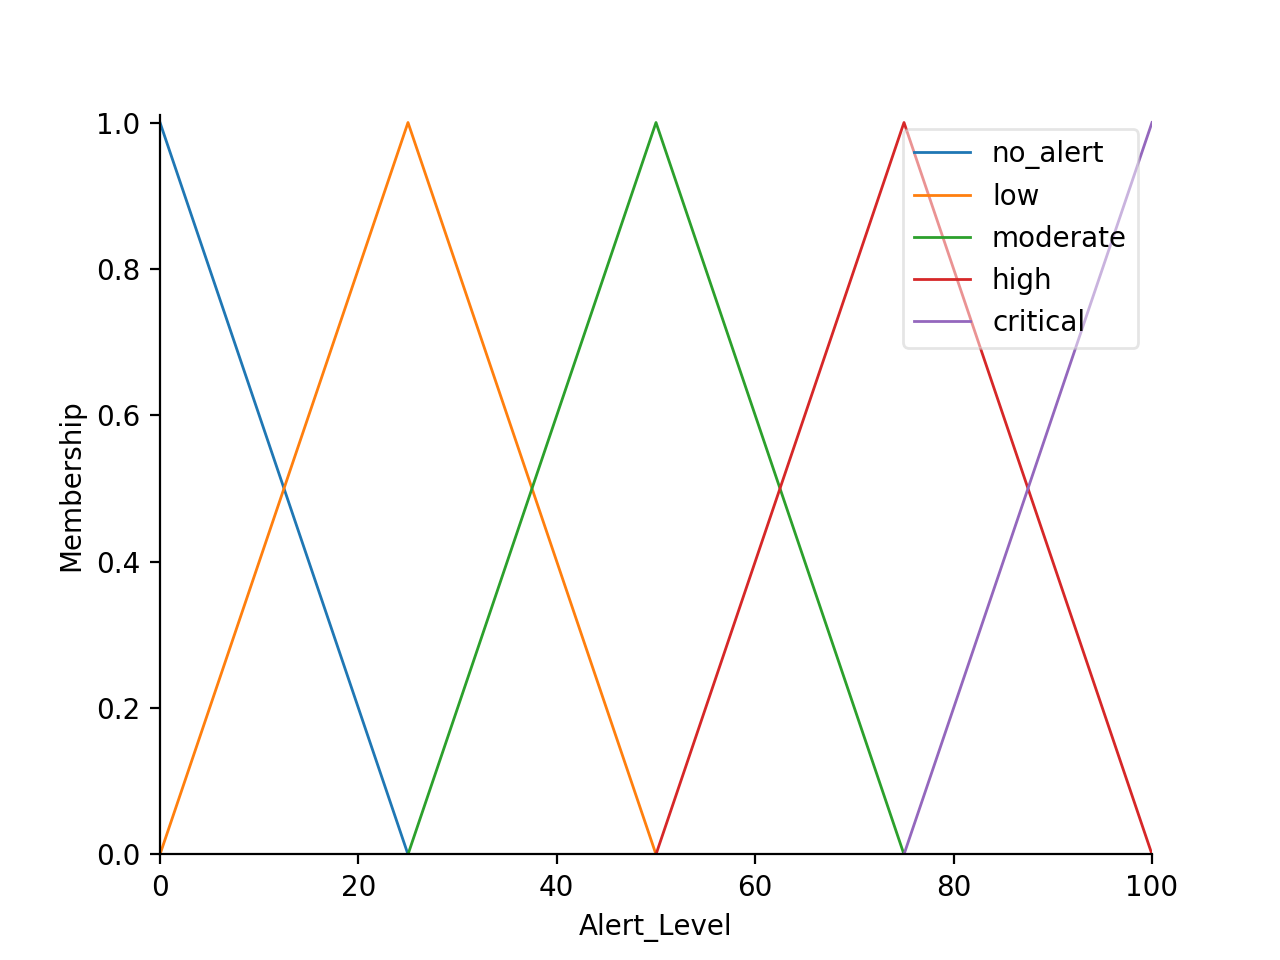

In [2]:
import numpy as np

import skfuzzy as fuzz
from skfuzzy import control as ctrl

import pandas as pd


#%matplotlib inline

%matplotlib notebook  
%matplotlib notebook  

import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'Temperature')
age = ctrl.Antecedent(np.arange(0, 37, 1), 'Age')
alert = ctrl.Consequent(np.arange(0, 101, 1), 'Alert_Level')

# Auto-membership function population is possible with .automf(3, 5, or 7)
#age.automf(5)
#temperature.automf(5)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API

alert['no_alert'] = fuzz.trimf(alert.universe, [0, 0, 25])
alert['low'] = fuzz.trimf(alert.universe, [0, 25, 50])
alert['moderate'] = fuzz.trimf(alert.universe, [25, 50, 75])
alert['high'] = fuzz.trimf(alert.universe, [50, 75, 100])
alert['critical'] = fuzz.trimf(alert.universe, [75, 100, 100])

# You can see how these look with .view()
alert.view()

<IPython.core.display.Javascript object>


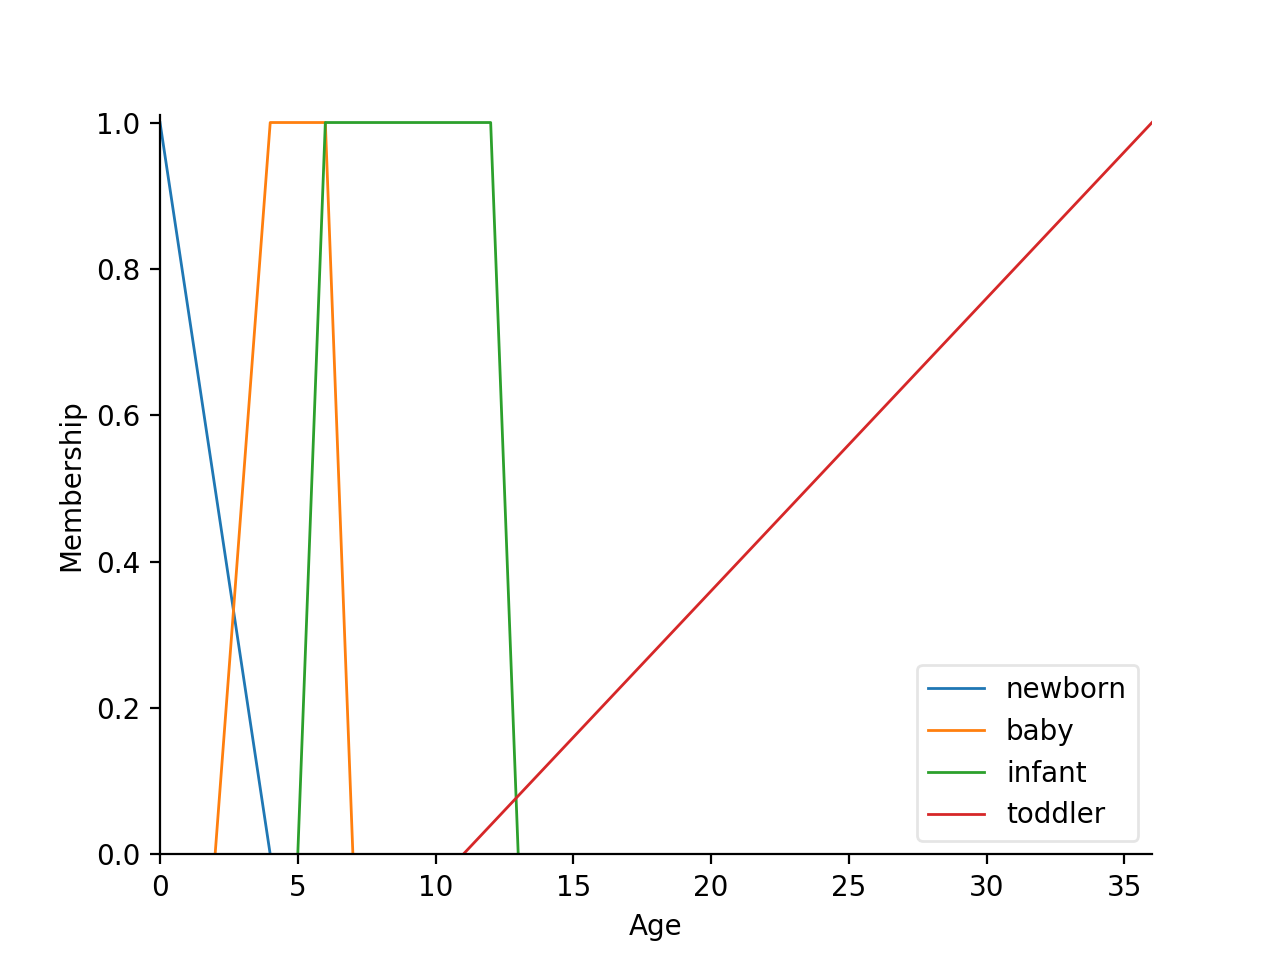

In [3]:
#newborns (0-3 months), babies (3-6 months), infants (6-12 months) and toddlers (12-36 months)
#at least 2 months of overlap

age['newborn'] = fuzz.trimf(age.universe,[0,0,4])
age['baby'] = fuzz.trapmf(age.universe,[2,4,6,7])
age['infant'] = fuzz.trapmf(age.universe,[5,6,12,13])
age['toddler'] = fuzz.trimf(age.universe,[11,36,36])
age.view()

<IPython.core.display.Javascript object>


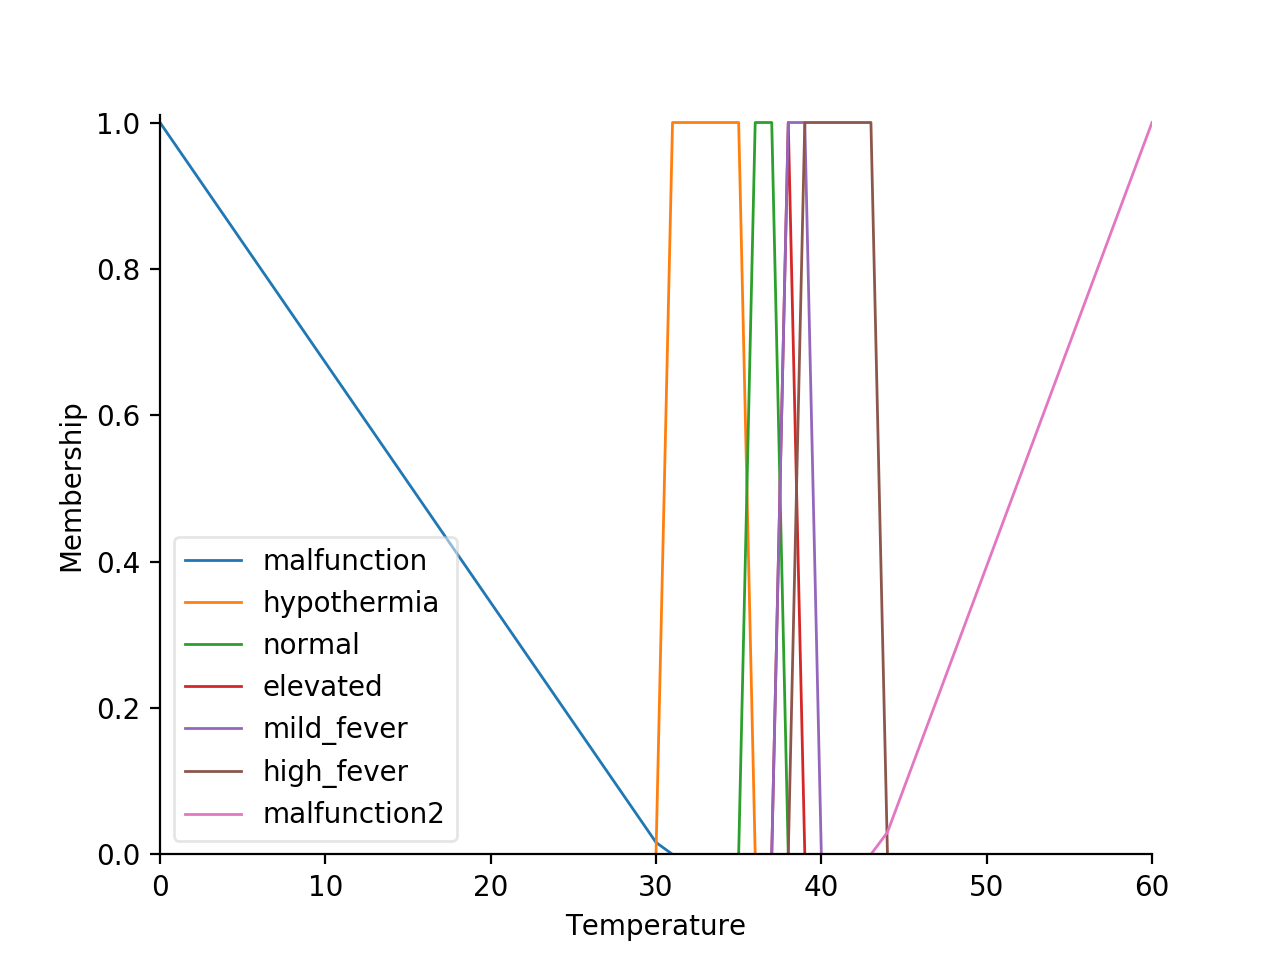

In [4]:
#at least 1 degree Celcius of overlap

#Values outside of the range [30,44] are likely to indicate malfunctioning of the sensor'
temperature['malfunction'] = fuzz.trimf(temperature.universe,[0,0,30.5])

#Values of about 35,5 and below are hypothermia
temperature['hypothermia'] = fuzz.trapmf(temperature.universe,[30,30.5,35.5,36])

#Values of roughly 37 are normal
temperature['normal'] = fuzz.trapmf(temperature.universe,[35,35.5,37.5,38])

#Change done for step 5
#In the membership function, the range [36.5, 37,5] is already covered in 'normal'.

#Values between roughly 37,5 and 38 are elevated
temperature['elevated'] = fuzz.trapmf(temperature.universe,[37,37.5,38,38.5])

#Values of around 38,5 indicate mild fever
temperature['mild_fever'] = fuzz.trapmf(temperature.universe,[37.5,38,39,39.5])

#Values of 39 and higher indicate high fever
temperature['high_fever'] = fuzz.trapmf(temperature.universe,[38.5,39,43.5,44])

#Values outside of the range [30,44] are likely to indicate malfunctioning of the sensor'
temperature['malfunction2'] = fuzz.trimf(temperature.universe,[43.5,60,60])

temperature.view()

### Step 2: Define the rules
Translate the desired behaviour given above, to rules for alert levels. Start by only defining those which are given. More may be needed, after inspecting the output (Step 4).

<IPython.core.display.Javascript object>


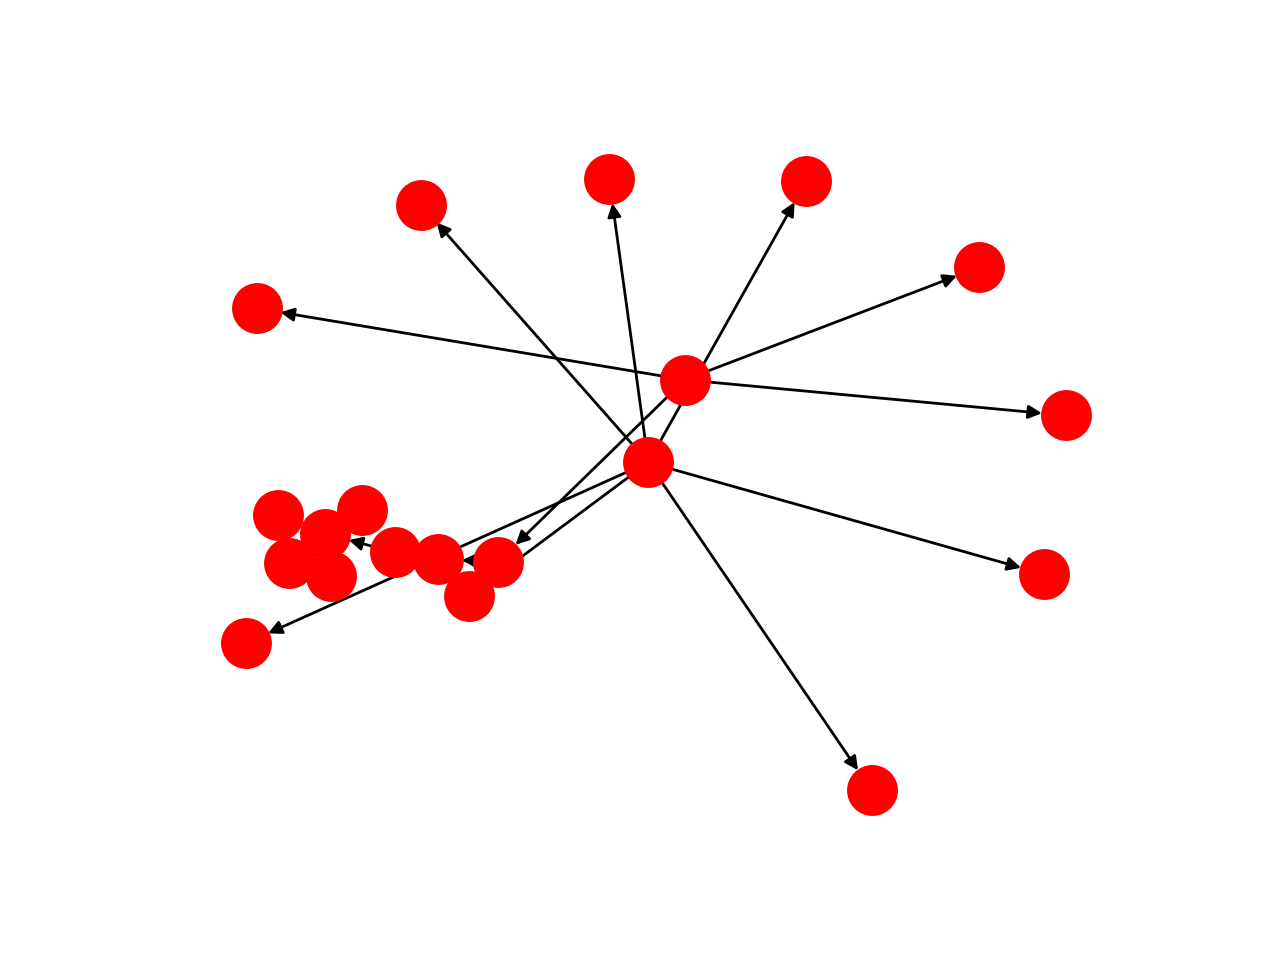

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<IPython.core.display.Javascript object>


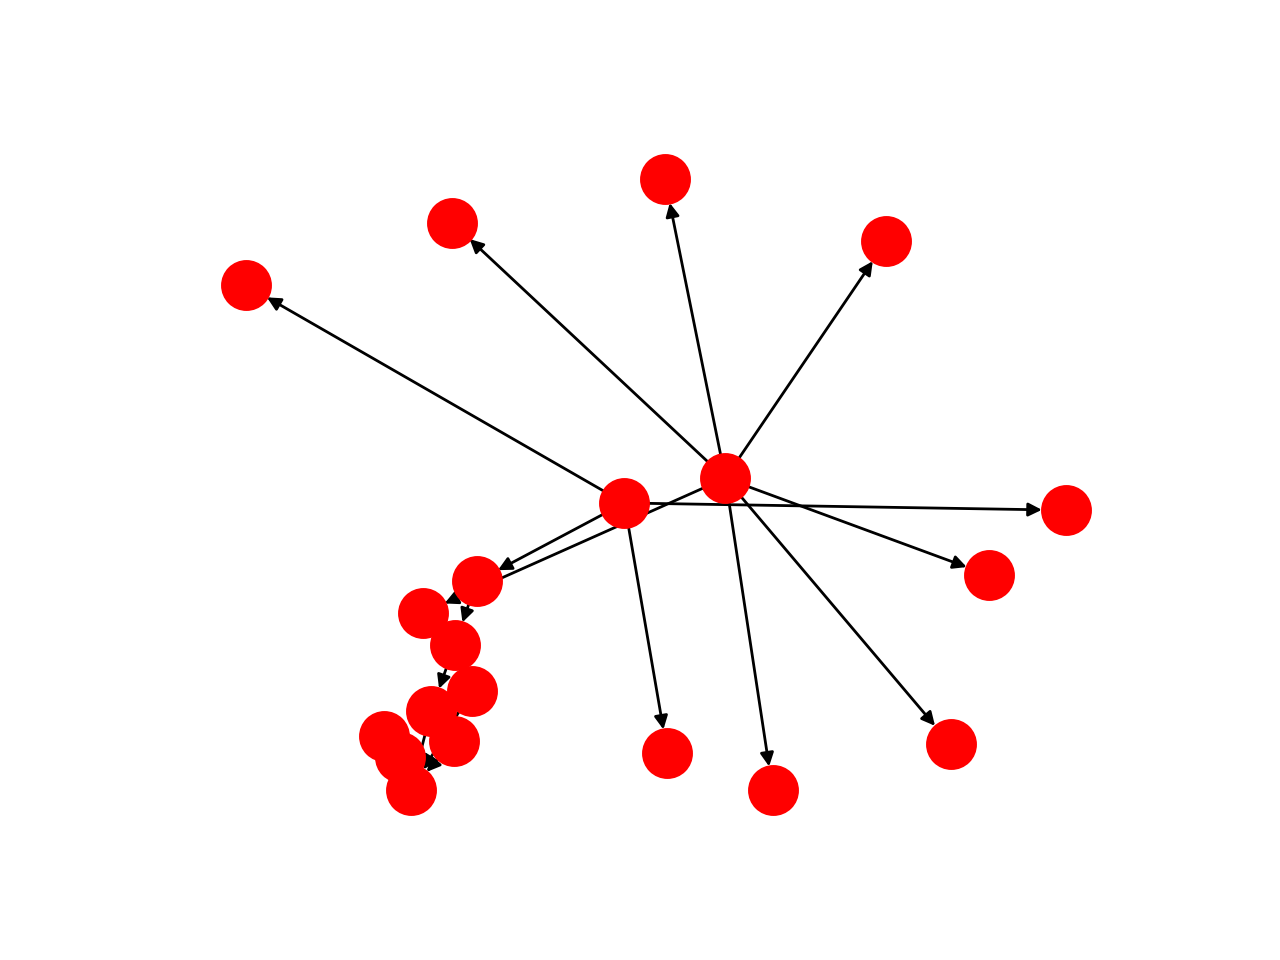

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa2662f208>)

In [5]:
# For newborns, elevated temperature should give a moderate alert, a mild fever should correspond to a high alert, and a high fever should correspond to critical alert-level. 
# Babies with a mild fever should give a moderate alarm, while high fever should be high alert. 
# Infants with a mild fever should be a low priority alert, and high fever should be moderate alert. 
# Toddlers with a mild and high fever both should give a low alert. 
# Hypothermia should always give a high alert level, except for newborns where it should be critical.
# Malfunctioning sensors should always give a moderate alert. 

rule1 = ctrl.Rule(age['newborn'] & temperature['elevated'], alert['moderate'])
rule2 = ctrl.Rule(age['newborn'] & temperature['mild_fever'], alert['high'])
rule3 = ctrl.Rule(age['newborn'] & temperature['high_fever'], alert['critical'])

rule1.view()

rule4 = ctrl.Rule(age['baby'] & temperature['mild_fever'], alert['moderate'])
rule5 = ctrl.Rule(age['baby'] & temperature['high_fever'], alert['high'])

rule6 = ctrl.Rule(age['infant'] & temperature['mild_fever'], alert['low'])
rule7 = ctrl.Rule(age['infant'] & temperature['high_fever'], alert['moderate'])

rule8 = ctrl.Rule(age['toddler'] & temperature['mild_fever'], alert['low'])
rule9 = ctrl.Rule(age['toddler'] & temperature['high_fever'], alert['low'])

#covers all ages for hypothermia
rule10 = ctrl.Rule(age['newborn'] & temperature['hypothermia'], alert['critical'])
rule11 = ctrl.Rule(temperature['hypothermia'], alert['high'])

rule12 = ctrl.Rule(temperature['malfunction'], alert['moderate'])
rule13 = ctrl.Rule(temperature['malfunction2'], alert['moderate'])

rule1.view()

<IPython.core.display.Javascript object>


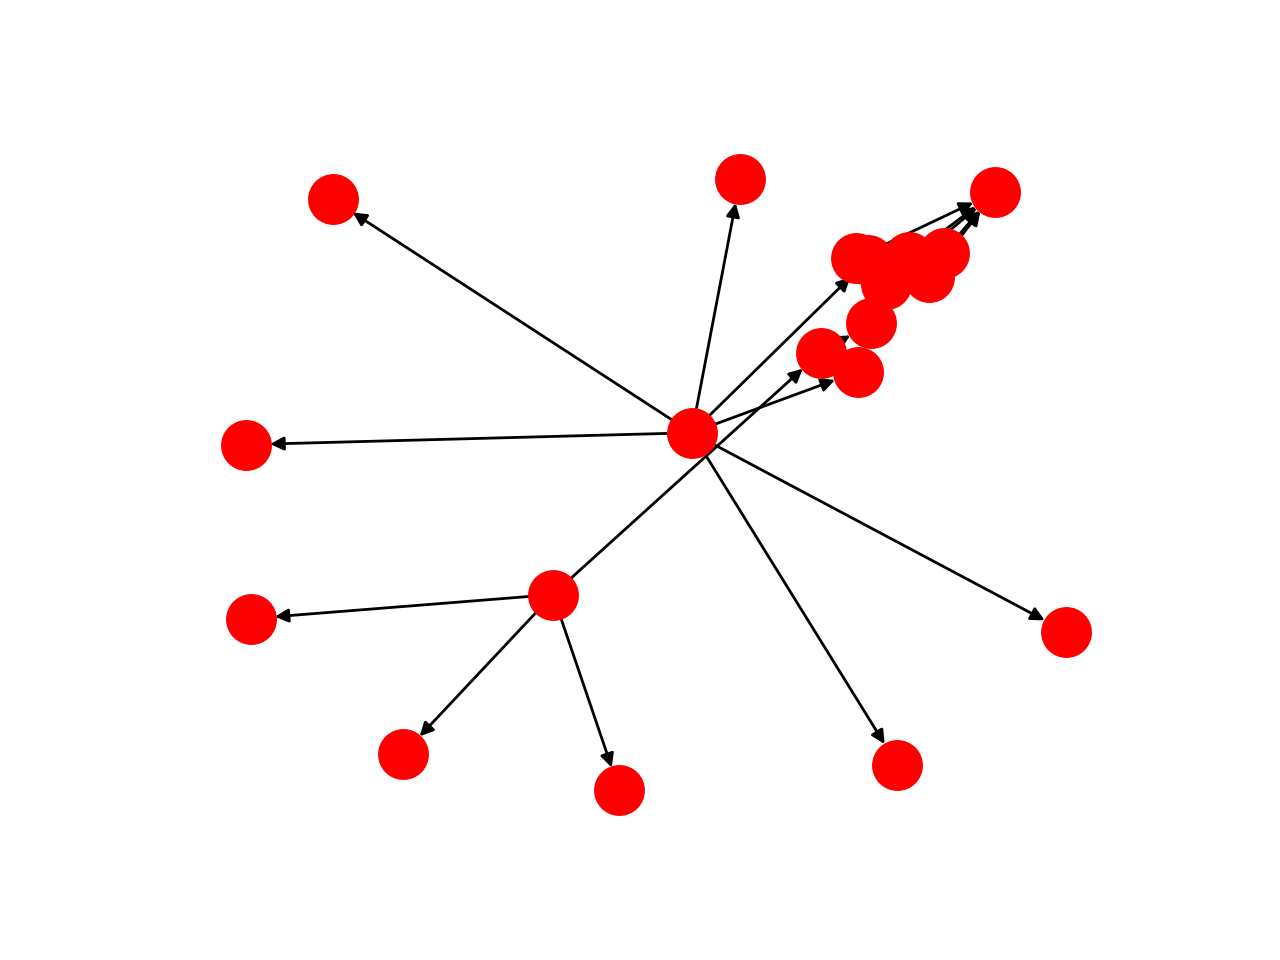

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa266bc6d8>)

In [6]:
#Extrarules step 4
rule14 = ctrl.Rule(age['newborn'] & temperature['normal'], alert['no_alert'])
rule15 = ctrl.Rule(age['baby'] & temperature['normal'], alert['no_alert'])
rule16 = ctrl.Rule(age['baby'] & temperature['elevated'], alert['no_alert'])
rule17 = ctrl.Rule(age['infant'] & temperature['normal'], alert['no_alert'])
rule18 = ctrl.Rule(age['infant'] & temperature['elevated'], alert['no_alert'])
rule19 = ctrl.Rule(age['toddler'] & temperature['normal'], alert['no_alert'])
rule20 = ctrl.Rule(age['toddler'] & temperature['elevated'], alert['no_alert'])

#Step 5
#As can be seen, all values 'normal', range [36.5, 37.5] give 'no_alert' as result.

rule1.view()

### Step 3: Load and test the system
Make a control system by loading the rules. Now verify the output for particular inputs using the control system simulation. Output the alert level, and visualize the alert membership. __Tip:__ use the functions ctrl.ControlSystemSimulation and alert.view(). 


<IPython.core.display.Javascript object>


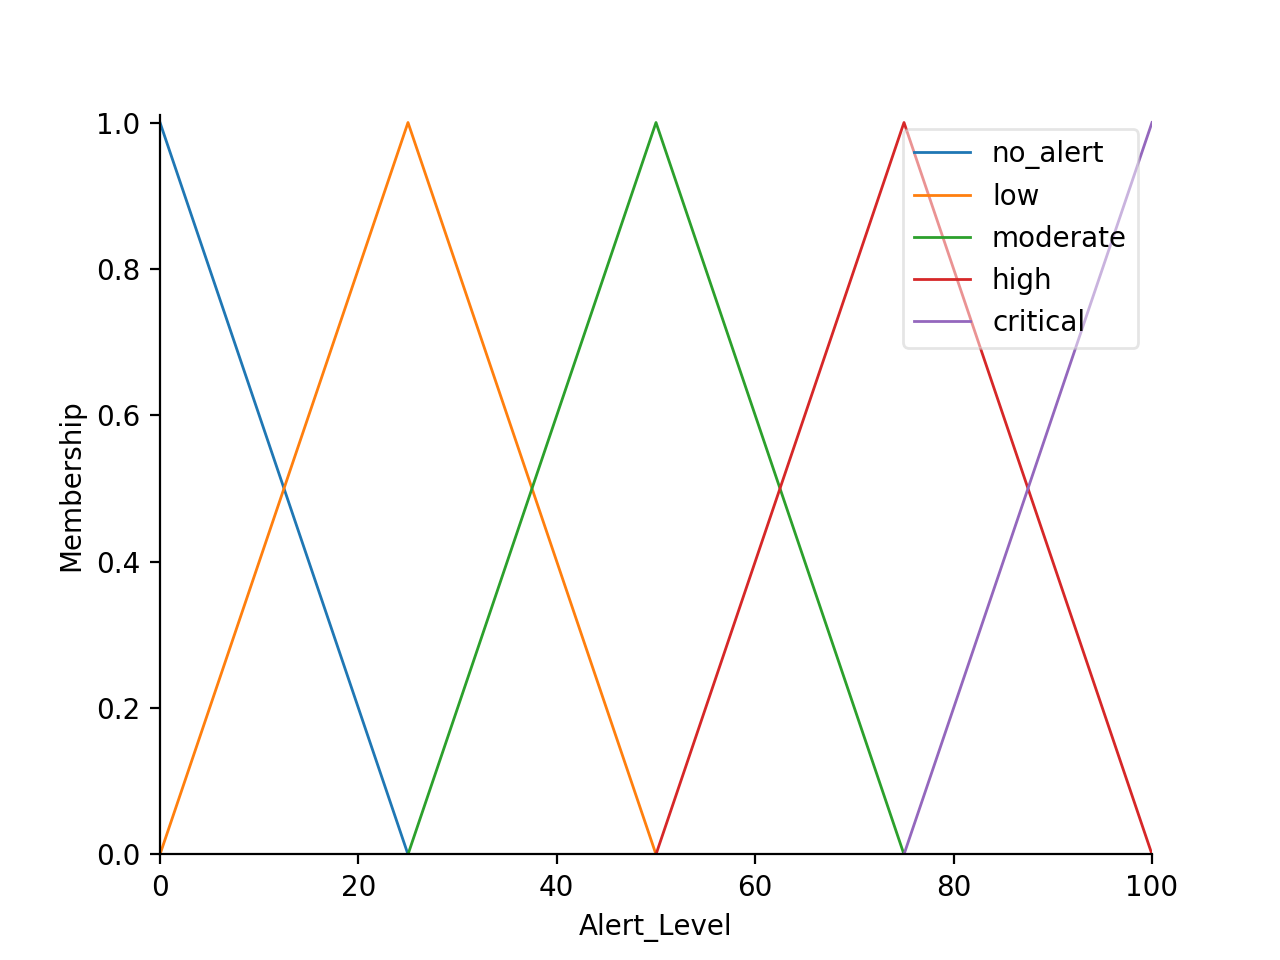

78.68878932042817


<IPython.core.display.Javascript object>


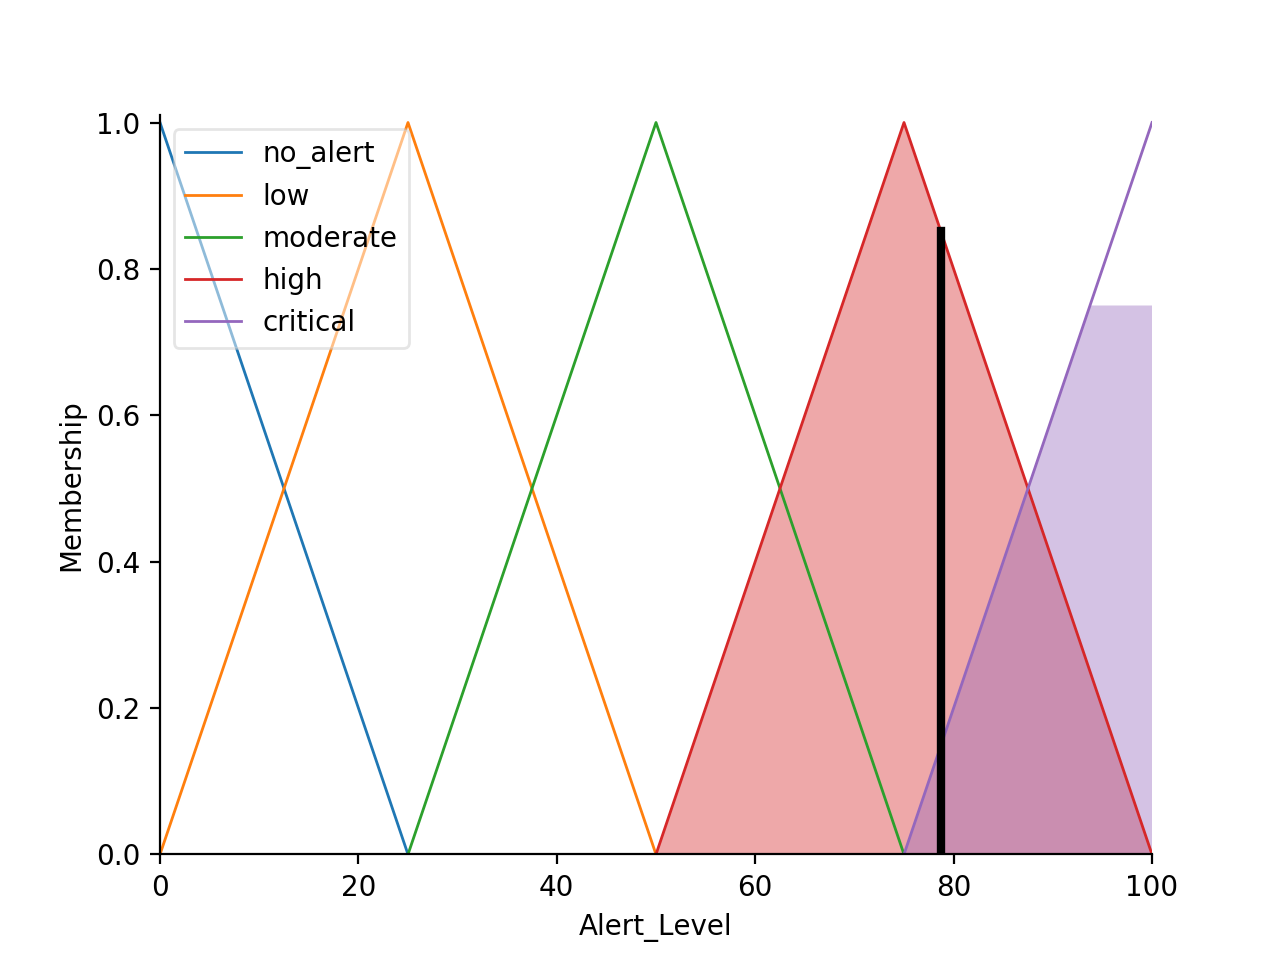

In [7]:
alert_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
level = ctrl.ControlSystemSimulation(alert_ctrl)
alert.view()

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
level.input['Age'] = 1
level.input['Temperature'] = 34

# Crunch the numbers
level.compute()

print (level.output['Alert_Level'])
alert.view(sim=level)

### Step 4: Test the system

Make plots of the evolution of the alerts, for the following cases

    * For an age of 1 month, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For an age of 8 months, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For a temperature of 38.5 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    * For a temperature of 40 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    
Add rules for cases not currently covered (and which may give errors due to sparsity in the inference engine).


        

#### 1 Month Temperature Alerts

<IPython.core.display.Javascript object>


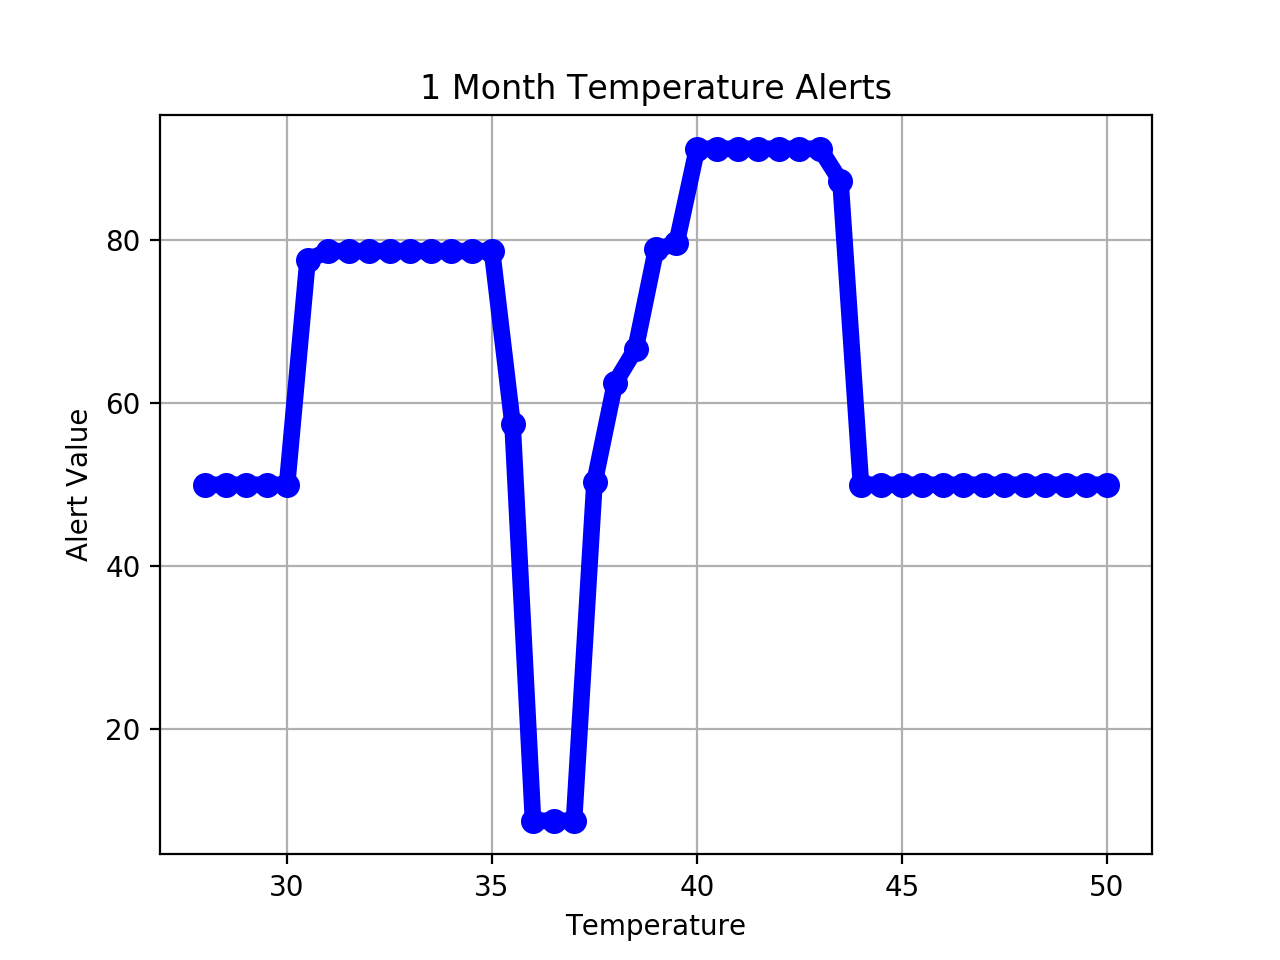

In [8]:
month1_x = []   
month1_y = []   
input_temp=28

for i in range(45):
    level.input['Age'] = 1
    level.input['Temperature'] = input_temp
    level.compute()
    input_temp = input_temp + 0.5
    #print (level.output['Alert_Level'])
    ol = level.output['Alert_Level']
    #print (i)
    temp_1 = input_temp - 0.5
    #print(temp_1)
    month1_x.append(temp_1)
    #print(ol)
    month1_y.append(ol)

#print(*month1_x)
#print(*month1_y)

month1 = np.array([[month1_x], [month1_y]])
month1_transpose = month1.transpose()
# print(f'Temperatures:\n{month1_transpose}')

# %matplotlib notebook  
fig, ax = plt.subplots()
ax.plot(month1_x, month1_y, color='blue', marker='o', linestyle='solid', linewidth=6, markersize=8)
plt.title('1 Month Temperature Alerts')
plt.xlabel('Temperature')
plt.ylabel('Alert Value')
plt.grid(True)
plt.show()

#### 8 Months Temperature Alerts

<IPython.core.display.Javascript object>


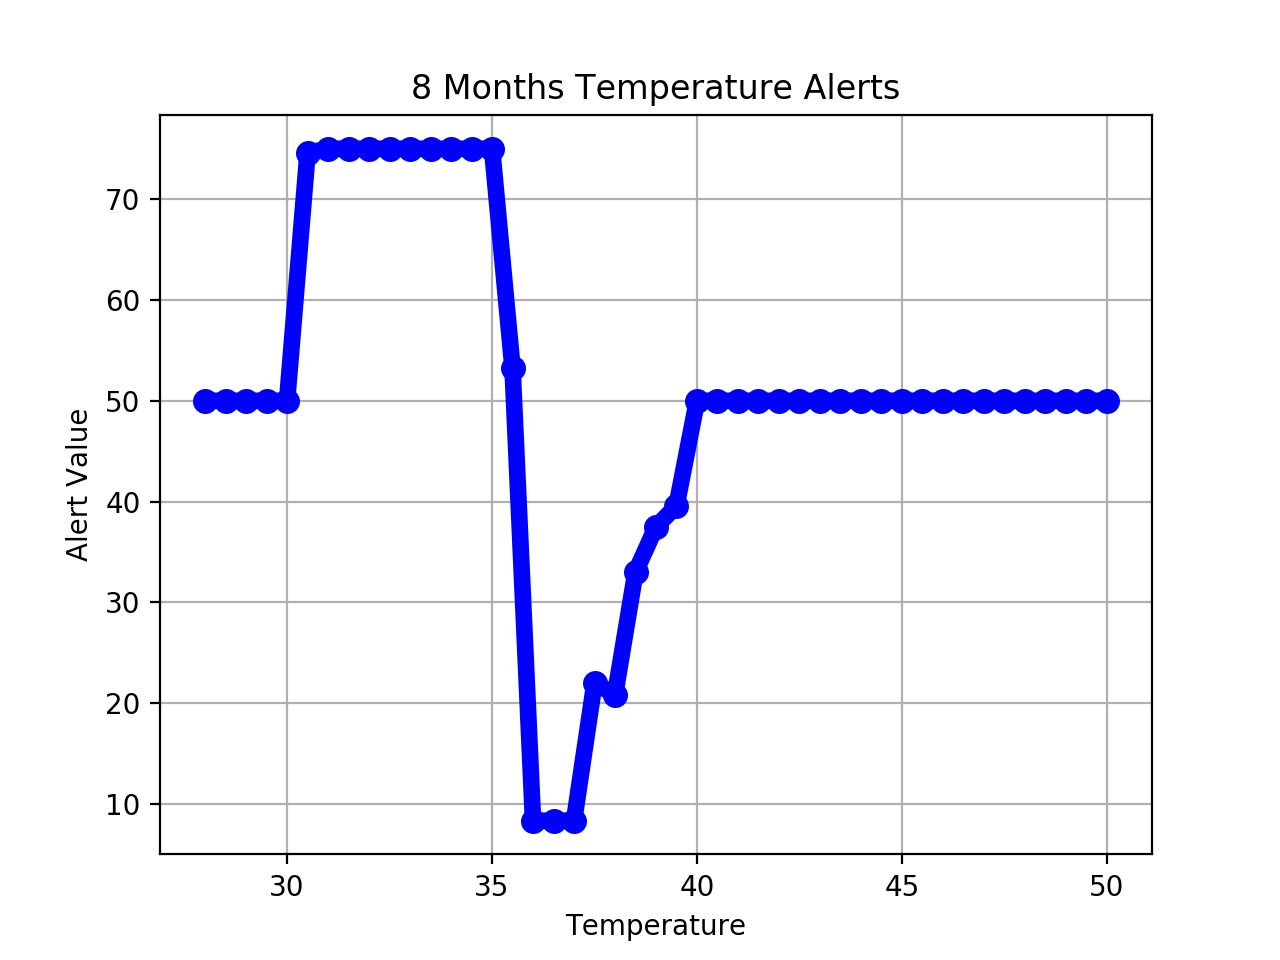

In [9]:
month8_x = []   
month8_y = []   
input_temp=28

for i in range(45):
    level.input['Age'] = 8
    level.input['Temperature'] = input_temp
    level.compute()
    input_temp = input_temp + 0.5
    #print (level.output['Alert_Level'])
    ol = level.output['Alert_Level']
    #print (i)
    temp_1 = input_temp - 0.5
    #print(temp_1)
    month8_x.append(temp_1)
    #print(ol)
    month8_y.append(ol)

#print(*month8_x)
#print(*month8_y)

month8 = np.array([[month8_x], [month8_y]])
month8_transpose = month8.transpose()
# print(f'Temperatures:\n{month8_transpose}')

# %matplotlib notebook  
fig, ax = plt.subplots()
ax.plot(month8_x, month8_y, color='blue', marker='o', linestyle='solid', linewidth=6, markersize=8)
plt.title('8 Months Temperature Alerts')
plt.xlabel('Temperature')
plt.ylabel('Alert Value')
plt.grid(True)

#### 38.5 °C Age Alerts

<IPython.core.display.Javascript object>


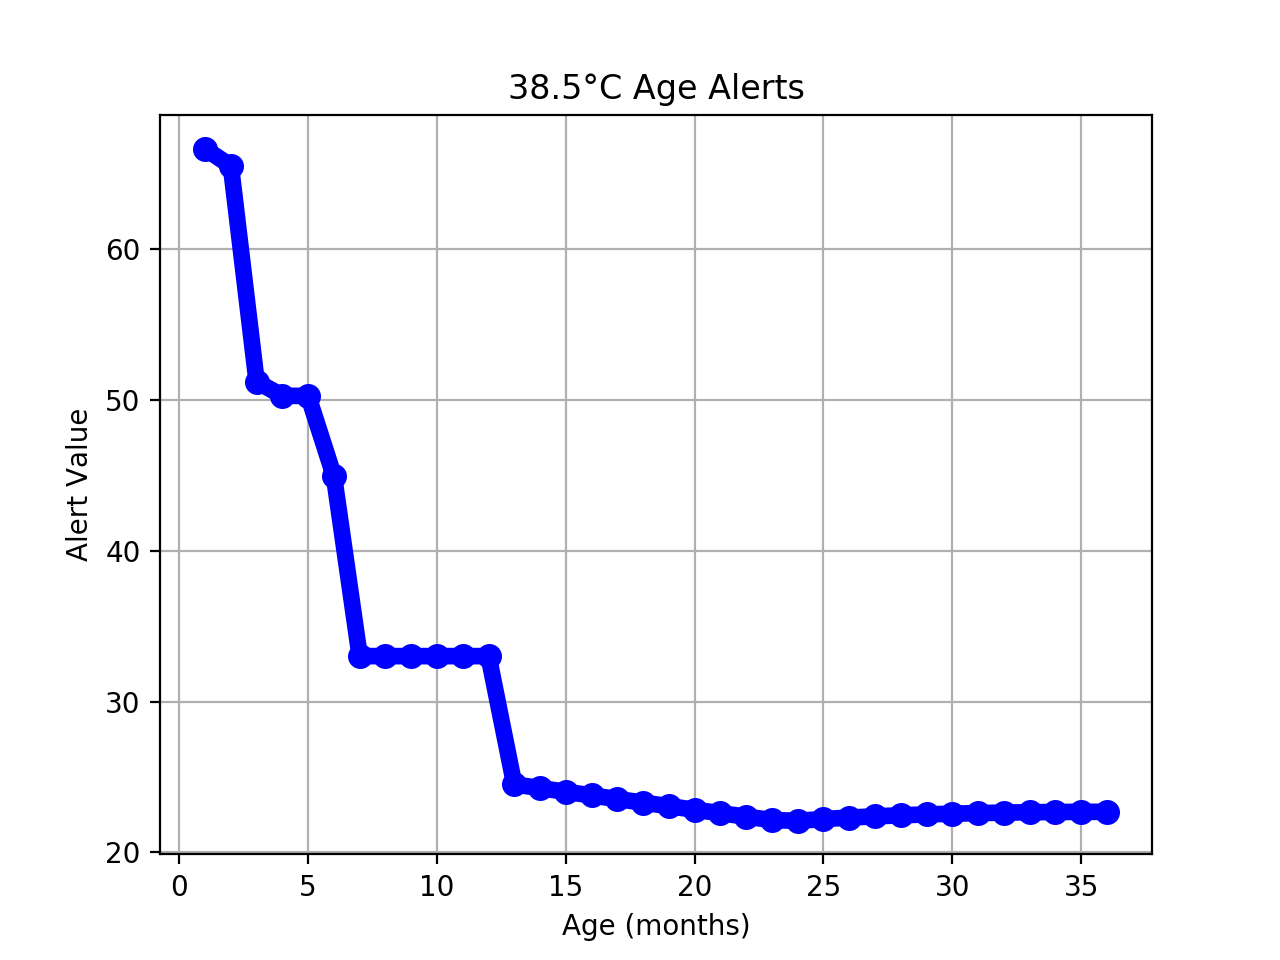

In [10]:
temp38_x = []   
temp38_y = []   
input_age=1

for i in range(36):
    level.input['Age'] = input_age
    level.input['Temperature'] = 38.5
    level.compute()
    input_age = input_age + 1
    #print (level.output['Alert_Level'])
    ol = level.output['Alert_Level']
    #print (i)
    age_1 = input_age - 1
    #print(age_1)
    temp38_x.append(age_1)
    #print(ol)
    temp38_y.append(ol)

#print(*temp38_x)
#print(*temp38_y)

temp38 = np.array([[temp38_x], [temp38_y]])
temp38_transpose = temp38.transpose()
# print(f'Temperatures:\n{temp38_transpose}')

# %matplotlib notebook  
fig, ax = plt.subplots()
ax.plot(temp38_x, temp38_y, color='blue', marker='o', linestyle='solid', linewidth=6, markersize=8)
plt.title('38.5°C Age Alerts')
plt.xlabel('Age (months)')
plt.ylabel('Alert Value')
plt.grid(True)

#### 40 °C Age Alerts

<IPython.core.display.Javascript object>


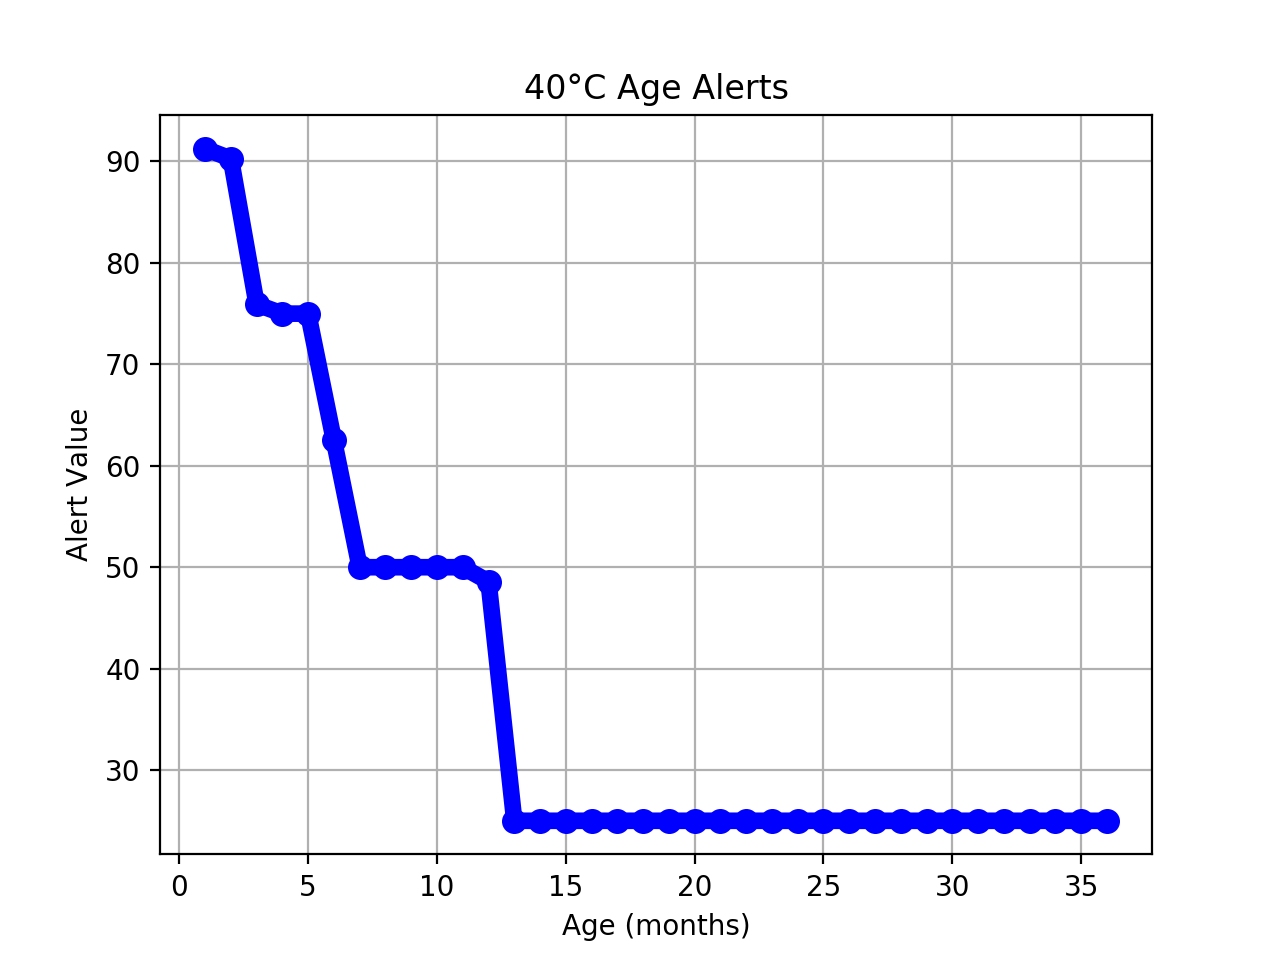

In [11]:
temp40_x = []   
temp40_y = []   
input_age=1

for i in range(36):
    level.input['Age'] = input_age
    level.input['Temperature'] = 40
    level.compute()
    input_age = input_age + 1
    #print (level.output['Alert_Level'])
    ol = level.output['Alert_Level']
    #print (i)
    age_1 = input_age - 1
    #print(age_1)
    temp40_x.append(age_1)
    #print(ol)
    temp40_y.append(ol)

#print(*temp40_x)
#print(*temp40_y)

temp40 = np.array([[temp40_x], [temp40_y]])
temp40_transpose = temp40.transpose()
# print(f'Temperatures:\n{temp40_transpose}')


# %matplotlib notebook  
fig, ax = plt.subplots()
ax.plot(temp40_x, temp40_y, color='blue', marker='o', linestyle='solid', linewidth=6, markersize=8)
plt.title('40°C Age Alerts')
plt.xlabel('Age (months)')
plt.ylabel('Alert Value')
plt.grid(True)

### Step 5:  Visualize the output and tune the system

Make a 2D surface plot with the output of the alert system for ages [1,36] and temperatures [28, 46]. Tune the system such that the alert level is always within the no-alert range for temperatures in the range [36.5, 37.5]. You can adjust the system by modifying the membership functions, changing the rules or inference system; till you obtain the desired behaviour.  

<IPython.core.display.Javascript object>


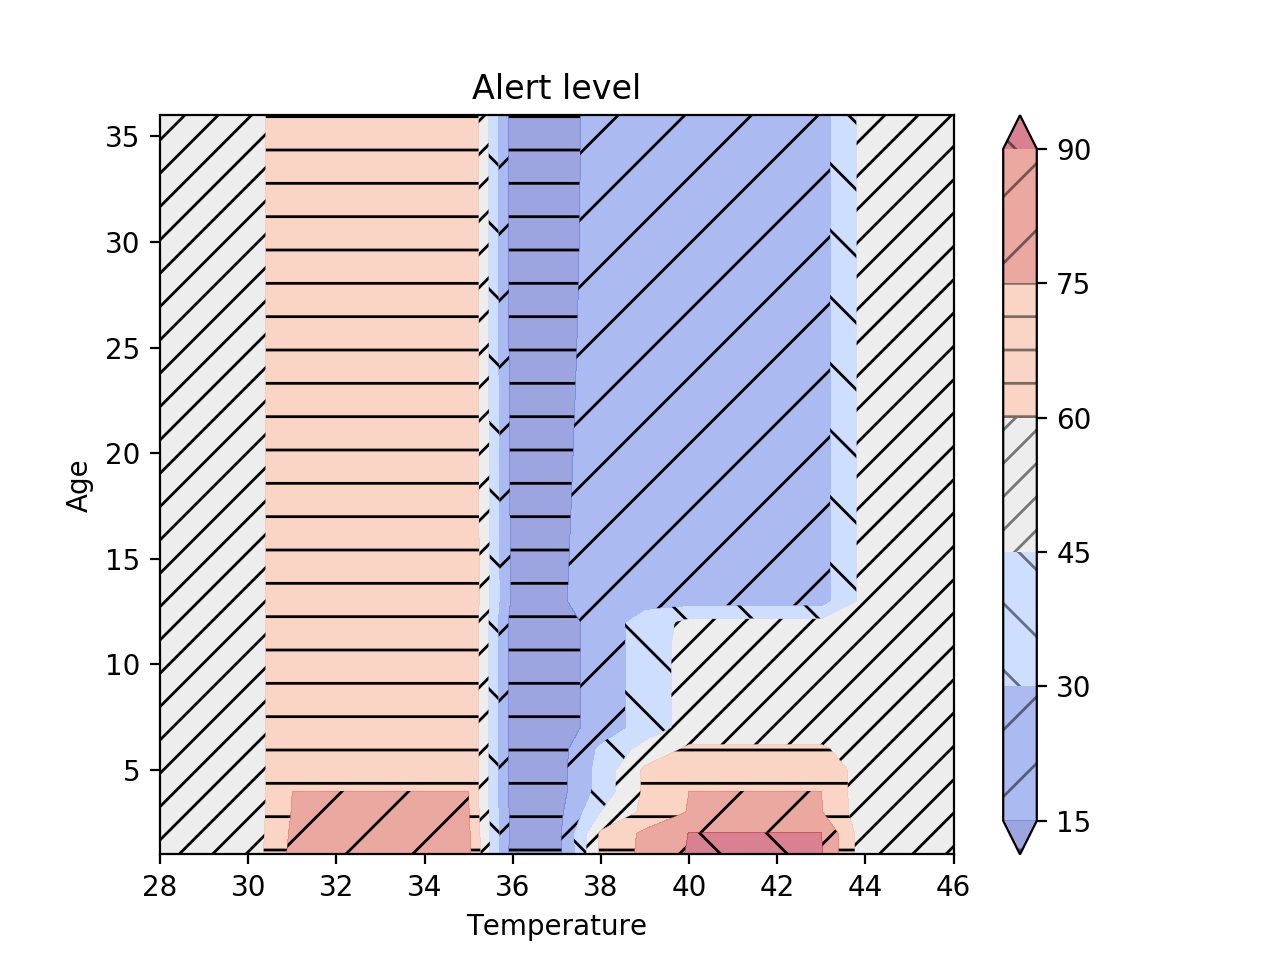

Text(0, 0.5, 'Age')

In [12]:
temp5_x = []   
temp5_y = []  
temp5_z = []


for age in range(1,37):
        
    for temp in range (28,47):
    
        level.input['Age'] = age
        level.input['Temperature'] = temp
        level.compute()
        
        #print (level.output['alert_level'])
    
        ol = level.output['Alert_Level']
        temp5_z.append(ol)
        temp5_x.append(age)
        temp5_y.append(temp)


# print(temp5_x)
# print(temp5_y)
# print(temp5_z)

# print(np.array(temp5_x).shape)
# print(np.array(temp5_y).shape)
# print(np.array(temp5_z).shape)

dsa=np.split(np.array(temp5_z), 36)
x=range(28,47)
y=range(1,37)

# print(dsa)
# print(np.array(dsa).shape)

# %matplotlib notebook
fig1, ax1 = plt.subplots()
cs = ax1.contourf(x,y,dsa, hatches=['-', '/', '\\', '//'], cmap='coolwarm', extend='both', alpha=0.5)
fig1.colorbar(cs)
ax1.set_title('Alert level')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Age')

## Part 2: A Bayesian belief network for lung cancer
In this exercise we will translate clinical knowledge into a bayesian belief network (the percentages given below are fictive). The goal is to compute the probabilities of presence of cancer, given certain information about the patient. Additionally, we wish to determine the impact on diagnostic tests, when prior information about the patient is given. 

The changes for lung cancer for someone living a healthy life in a healthy surrounding are slim (3%). They are mainly influenced by smoking (7%), being exposed to pollution (6%), or both (9%). Patients over 50 (about 30% of the population) have the biggest chance of being exposed to pollution (60%), which is significantly more than patients with ages below 50 (10%). Patients over 50 are also more likely to smoke. In fact, one in four males over 50 still smokes, while only 13% of females over 50 smokes. With respect to the population with ages below 50 the difference is remarkable: 20% and 7% for males and females, respectively.  

Two tests are primarily done to determine lung cancer: an X-ray scan of the chest, and a Serum Calcium test. Lung cancer has about 85% chance of getting detected using an X-ray. In rare cases (5%), X-ray leads to a positive reading for cases where there is no tumour present. This can be verified using CT imaging. The serum calcium test is cheap, but not very reliable for lung cancer: only 70% sensitivity and a false positive result in about 35% of the negative cases.


### Step 1: Design the probalistic graphical model 
Use the package graphviz to draw the bayesian belief network and visualize the network. For now, focuss on dependencies between the different criteria by establishing edges between the different nodes. You should end up with a graph of seven nodes. 


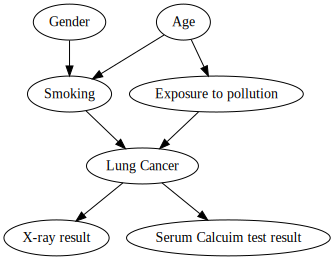

In [13]:
from graphviz import Digraph

dot = Digraph(comment='Lung Cancer Bayesian Belief Network')
dot.node('X', 'X-ray result')
dot.node('SC', 'Serum Calcuim test result')
dot.node('SM', 'Smoking')
dot.node('A', 'Age')
dot.node('G', 'Gender')
dot.node('C', 'Lung Cancer')
dot.node('POLL', 'Exposure to pollution')

dot.edge('A', 'SM')
dot.edge('A', 'POLL')
dot.edge('G', 'SM')
dot.edge('SM', 'C')
dot.edge('POLL', 'C')
dot.edge('C', 'X')
dot.edge('C', 'SC')


dot

### Step 2: Build the probabilistic graphical model
Now use the package pgmpy to build the computational probabilistic graphical model, named cancer_model, by specifying the edges. You can verify the model you defined using the cancer_model.edges() and cancer_model.nodes() commands.

In [14]:
from pgmpy.models import BayesianModel
cancer_model = BayesianModel([
                              ('Gender', 'Smoking'), 
                              ('Age', 'Exp to pollution'), 
                              ('Age', 'Smoking'),
                              ('Exp to pollution', 'Lung Cancer'), 
                              ('Smoking', 'Lung Cancer'),
                              ('Lung Cancer', 'X-ray result'),
                              ('Lung Cancer', 'S Calcuim result')])

In [15]:
cancer_model.edges()

OutEdgeView([('Gender', 'Smoking'), ('Smoking', 'Lung Cancer'), ('Age', 'Exp to pollution'), ('Age', 'Smoking'), ('Exp to pollution', 'Lung Cancer'), ('Lung Cancer', 'X-ray result'), ('Lung Cancer', 'S Calcuim result')])

In [16]:
cancer_model.nodes()

NodeView(('Gender', 'Smoking', 'Age', 'Exp to pollution', 'Lung Cancer', 'X-ray result', 'S Calcuim result'))

### Step 3: Define the conditional probability distributions (CPDs)
Using the knowledge given above, fill in the conditional probabilities for each node using the TabularCPD command. Finding out the order of the probabilities can be a bit tricky. Have a look at http://pgmpy.org/factors.html for an example. 

In [17]:
from pgmpy.factors.discrete import TabularCPD

# Solution

cpd_gender = TabularCPD(variable='Gender', variable_card=2,
                      values=[[0.45], [0.55]],state_names={'Gender': ['Male', 'Female']})

cpd_age = TabularCPD(variable='Age', variable_card=2,
                      values=[[0.3], [0.7]],state_names={'Age': ['Over 50', 'Below 50']})

cpd_poll = TabularCPD(variable='Exp to pollution', variable_card=2,
                      values=[[0.6, 0.1], [0.4, 0.9]],
                      evidence=['Age'], evidence_card=[2],state_names={'Exp to pollution': ['Yes', 'No'],
                                   'Age': ['Over 50', 'Below 50']})

cpd_smoking = TabularCPD(variable='Smoking', variable_card=2,
                        values=[[0.25, 0.13, 0.2, 0.07],
                                [0.75, 0.87, 0.8, 0.93]],
                        evidence=['Age', 'Gender'],
                        evidence_card=[2, 2],state_names={'Smoking': ['Yes', 'No'],
                                   'Age': ['Over 50', 'Below 50'],
                                   'Gender': ['Male', 'Female']})

cpd_cancer = TabularCPD(variable='Lung Cancer', variable_card=2,
                        values=[[0.09, 0.07, 0.06, 0.03],
                                [0.91, 0.93, 0.94, 0.97]],
                        evidence=['Smoking', 'Exp to pollution'],
                        evidence_card=[2, 2], state_names={'Lung Cancer': ['Yes', 'No'],
                                   'Exp to pollution': ['Yes', 'No'],
                                   'Smoking': ['Yes', 'No']})

cpd_xray= TabularCPD(variable='X-ray result', variable_card=2,
                      values=[[0.85, 0.05], [0.15, 0.95]],
                      evidence=['Lung Cancer'], evidence_card=[2],state_names={'X-ray result': ['Positive', 'Negative'],
                                   'Lung Cancer': ['Yes', 'No']})

cpd_serum= TabularCPD(variable='S Calcuim result', variable_card=2,
                      values=[[0.70, 0.35], [0.30, 0.65]],
                      evidence=['Lung Cancer'], evidence_card=[2],state_names={'S Calcuim result': ['Positive', 'Negative'],
                                   'Lung Cancer': ['Yes', 'No']})


### Step 4: Associate the CPDs to the model structure, and test the model
Next, associate the CPDs to the model structure and check for consistency.

Perform inference on you model using VariableElimination and verify the outcome is intuitively correct for all nodes (e.g. chance of cancer should increase given evidence of smoking, etc.). Adjust the definition of the CPDs if needed. 

In [18]:
# Associating the parameters with the model structure.
cancer_model.add_cpds(cpd_gender, cpd_age, cpd_poll, cpd_smoking, cpd_cancer, cpd_xray, cpd_serum)
# cancer_model.add_cpds(cpd_gender)

# Checking if the cpds are valid for the model.
cancer_model.check_model()

True

In [19]:
from pgmpy.inference import VariableElimination
cancer_model.get_cpds()

[<TabularCPD representing P(Gender:2) at 0x1a3ccf0f28>,
 <TabularCPD representing P(Age:2) at 0x1a3ccf0ef0>,
 <TabularCPD representing P(Exp to pollution:2 | Age:2) at 0x1a3ccf0eb8>,
 <TabularCPD representing P(Smoking:2 | Age:2, Gender:2) at 0x1a3ccf0fd0>,
 <TabularCPD representing P(Lung Cancer:2 | Smoking:2, Exp to pollution:2) at 0x1a3ccf0f60>,
 <TabularCPD representing P(X-ray result:2 | Lung Cancer:2) at 0x1a3ccf0f98>,
 <TabularCPD representing P(S Calcuim result:2 | Lung Cancer:2) at 0x1a3ccf8080>]

In [20]:
print(cpd_gender)

+----------------+------+
| Gender(Male)   | 0.45 |
+----------------+------+
| Gender(Female) | 0.55 |
+----------------+------+


In [21]:
print(cpd_age)

+---------------+-----+
| Age(Over 50)  | 0.3 |
+---------------+-----+
| Age(Below 50) | 0.7 |
+---------------+-----+


In [22]:
print(cpd_poll)

+-----------------------+--------------+---------------+
| Age                   | Age(Over 50) | Age(Below 50) |
+-----------------------+--------------+---------------+
| Exp to pollution(Yes) | 0.6          | 0.1           |
+-----------------------+--------------+---------------+
| Exp to pollution(No)  | 0.4          | 0.9           |
+-----------------------+--------------+---------------+


In [23]:
print(cpd_smoking)

+--------------+--------------+----------------+---------------+----------------+
| Age          | Age(Over 50) | Age(Over 50)   | Age(Below 50) | Age(Below 50)  |
+--------------+--------------+----------------+---------------+----------------+
| Gender       | Gender(Male) | Gender(Female) | Gender(Male)  | Gender(Female) |
+--------------+--------------+----------------+---------------+----------------+
| Smoking(Yes) | 0.25         | 0.13           | 0.2           | 0.07           |
+--------------+--------------+----------------+---------------+----------------+
| Smoking(No)  | 0.75         | 0.87           | 0.8           | 0.93           |
+--------------+--------------+----------------+---------------+----------------+


In [24]:
print(cpd_cancer)

+------------------+-----------------------+----------------------+-----------------------+----------------------+
| Smoking          | Smoking(Yes)          | Smoking(Yes)         | Smoking(No)           | Smoking(No)          |
+------------------+-----------------------+----------------------+-----------------------+----------------------+
| Exp to pollution | Exp to pollution(Yes) | Exp to pollution(No) | Exp to pollution(Yes) | Exp to pollution(No) |
+------------------+-----------------------+----------------------+-----------------------+----------------------+
| Lung Cancer(Yes) | 0.09                  | 0.07                 | 0.06                  | 0.03                 |
+------------------+-----------------------+----------------------+-----------------------+----------------------+
| Lung Cancer(No)  | 0.91                  | 0.93                 | 0.94                  | 0.97                 |
+------------------+-----------------------+----------------------+-------------

In [25]:
print(cpd_xray)

+------------------------+------------------+-----------------+
| Lung Cancer            | Lung Cancer(Yes) | Lung Cancer(No) |
+------------------------+------------------+-----------------+
| X-ray result(Positive) | 0.85             | 0.05            |
+------------------------+------------------+-----------------+
| X-ray result(Negative) | 0.15             | 0.95            |
+------------------------+------------------+-----------------+


In [26]:
print(cpd_serum)

+----------------------------+------------------+-----------------+
| Lung Cancer                | Lung Cancer(Yes) | Lung Cancer(No) |
+----------------------------+------------------+-----------------+
| S Calcuim result(Positive) | 0.7              | 0.35            |
+----------------------------+------------------+-----------------+
| S Calcuim result(Negative) | 0.3              | 0.65            |
+----------------------------+------------------+-----------------+


In [27]:
cancer_infer = VariableElimination(cancer_model)

In [28]:
cancer_dist = cancer_infer.query(['Lung Cancer'])

Eliminating: S Calcuim result: 100%|██████████| 6/6 [00:00<00:00, 264.69it/s]


In [29]:
print(cancer_dist)

+------------------+--------------------+
| Lung Cancer      |   phi(Lung Cancer) |
+==================+====================+
| Lung Cancer(Yes) |             0.0429 |
+------------------+--------------------+
| Lung Cancer(No)  |             0.9571 |
+------------------+--------------------+


It can be seen that the probability of having lung cancer increases when there is evidence of smoking

In [30]:
print(cancer_infer.query(['Lung Cancer'], evidence={'Smoking': 'Yes'}))

Eliminating: S Calcuim result: 100%|██████████| 5/5 [00:00<00:00, 307.77it/s]

+------------------+--------------------+
| Lung Cancer      |   phi(Lung Cancer) |
+==================+====================+
| Lung Cancer(Yes) |             0.0758 |
+------------------+--------------------+
| Lung Cancer(No)  |             0.9242 |
+------------------+--------------------+


### Step 5: Use your model to compute probabilities and answer questions

    * Whithout any information about the patient, what are the chances of having lung cancer, a positive X-ray and a positive serum Calcium test. Explain the discrepancy.  

In [31]:
print(cancer_infer.query(['Lung Cancer','X-ray result','S Calcuim result']))

Eliminating: Gender: 100%|██████████| 4/4 [00:00<00:00, 262.45it/s] 

+----------------------------+------------------+------------------------+--------------------------------------------------+
| S Calcuim result           | Lung Cancer      | X-ray result           |   phi(S Calcuim result,Lung Cancer,X-ray result) |
+============================+==================+========================+==================================================+
| S Calcuim result(Positive) | Lung Cancer(Yes) | X-ray result(Positive) |                                           0.0255 |
+----------------------------+------------------+------------------------+--------------------------------------------------+
| S Calcuim result(Positive) | Lung Cancer(Yes) | X-ray result(Negative) |                                           0.0045 |
+----------------------------+------------------+------------------------+--------------------------------------------------+
| S Calcuim result(Positive) | Lung Cancer(No)  | X-ray result(Positive) |                                           0

It can be seen that the probability is really low 2%, at this stage we don't have any evidence of the patient.

    * What are the probabilities in case we have evidence about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the first case.  

Probability of having lung cancer:

In [36]:
print(cancer_infer.query(['Lung Cancer']))

Eliminating: S Calcuim result: 100%|██████████| 6/6 [00:00<00:00, 290.30it/s]

+------------------+--------------------+
| Lung Cancer      |   phi(Lung Cancer) |
+==================+====================+
| Lung Cancer(Yes) |             0.0429 |
+------------------+--------------------+
| Lung Cancer(No)  |             0.9571 |
+------------------+--------------------+


Probability of having lung cancer with evidence of a patient over 50 and that is a smoker:

In [37]:
print(cancer_infer.query(['Lung Cancer'],evidence={'Age': 'Over 50','Smoking':'Yes'}))

Eliminating: S Calcuim result: 100%|██████████| 4/4 [00:00<00:00, 381.86it/s]

+------------------+--------------------+
| Lung Cancer      |   phi(Lung Cancer) |
+==================+====================+
| Lung Cancer(Yes) |             0.0820 |
+------------------+--------------------+
| Lung Cancer(No)  |             0.9180 |
+------------------+--------------------+


Once we have evidence of the age and smoking behaviour the probability of having lung cancer increases

In [38]:
print(cancer_infer.query(['Lung Cancer','X-ray result','S Calcuim result'],evidence={'Age': 'Over 50','Smoking':'Yes'}))

Eliminating: Gender: 100%|██████████| 2/2 [00:00<00:00, 284.98it/s] 

+----------------------------+------------------+------------------------+--------------------------------------------------+
| S Calcuim result           | Lung Cancer      | X-ray result           |   phi(S Calcuim result,Lung Cancer,X-ray result) |
+============================+==================+========================+==================================================+
| S Calcuim result(Positive) | Lung Cancer(Yes) | X-ray result(Positive) |                                           0.0488 |
+----------------------------+------------------+------------------------+--------------------------------------------------+
| S Calcuim result(Positive) | Lung Cancer(Yes) | X-ray result(Negative) |                                           0.0086 |
+----------------------------+------------------+------------------------+--------------------------------------------------+
| S Calcuim result(Positive) | Lung Cancer(No)  | X-ray result(Positive) |                                           0

When we have evidence that the patient is over 50 and he or she smokes, then the probability of lung cancer increases (4%)

    * What are the probabilities in case we have evidence of cancer (but not about the about the age and smoking behaviour of the patient)? Explain the difference with the previous cases.  

In [33]:
print(cancer_infer.query(['X-ray result','S Calcuim result'],evidence={'Lung Cancer': 'Yes'}))

Eliminating: Gender: 100%|██████████| 4/4 [00:00<00:00, 228.40it/s] 

+----------------------------+------------------------+--------------------------------------+
| S Calcuim result           | X-ray result           |   phi(S Calcuim result,X-ray result) |
+============================+========================+======================================+
| S Calcuim result(Positive) | X-ray result(Positive) |                               0.5950 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Positive) | X-ray result(Negative) |                               0.1050 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Negative) | X-ray result(Positive) |                               0.2550 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Negative) | X-ray result(Negative) |                               0.0450 |
+----------------------------+--------------------

We can see that the probabilities of a positive results in both test is really high (60%) when we have evidence of cancer

Probability of Smoking and  Exp to pollution : 

In [39]:
print(cancer_infer.query(['Smoking','Exp to pollution']))

Eliminating: Age: 100%|██████████| 5/5 [00:00<00:00, 291.70it/s]    

+--------------+-----------------------+---------------------------------+
| Smoking      | Exp to pollution      |   phi(Smoking,Exp to pollution) |
+==============+=======================+=================================+
| Smoking(Yes) | Exp to pollution(Yes) |                          0.0421 |
+--------------+-----------------------+---------------------------------+
| Smoking(Yes) | Exp to pollution(No)  |                          0.1030 |
+--------------+-----------------------+---------------------------------+
| Smoking(No)  | Exp to pollution(Yes) |                          0.2079 |
+--------------+-----------------------+---------------------------------+
| Smoking(No)  | Exp to pollution(No)  |                          0.6470 |
+--------------+-----------------------+---------------------------------+


Probability of Smoking and Exp to pollution with evidence of cancer:

In [34]:
print(cancer_infer.query(['Smoking','Exp to pollution'],evidence={'Lung Cancer': 'Yes'}))

Eliminating: Age: 100%|██████████| 4/4 [00:00<00:00, 375.09it/s]    

+--------------+-----------------------+---------------------------------+
| Smoking      | Exp to pollution      |   phi(Smoking,Exp to pollution) |
+==============+=======================+=================================+
| Smoking(Yes) | Exp to pollution(Yes) |                          0.0884 |
+--------------+-----------------------+---------------------------------+
| Smoking(Yes) | Exp to pollution(No)  |                          0.1682 |
+--------------+-----------------------+---------------------------------+
| Smoking(No)  | Exp to pollution(Yes) |                          0.2909 |
+--------------+-----------------------+---------------------------------+
| Smoking(No)  | Exp to pollution(No)  |                          0.4526 |
+--------------+-----------------------+---------------------------------+


It can be seen that the probabilty of being a smoker and exposed to pollution increases when we have a positive evidence of cancer

    * What are the probabilities in case we have evidence of cancer, and about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the previous cases.  

In [40]:
print(cancer_infer.query(['Exp to pollution'],evidence={'Lung Cancer': 'Yes','Age': 'Over 50','Smoking':'Yes'}))

Eliminating: S Calcuim result: 100%|██████████| 3/3 [00:00<00:00, 474.83it/s]

+-----------------------+-------------------------+
| Exp to pollution      |   phi(Exp to pollution) |
+=======================+=========================+
| Exp to pollution(Yes) |                  0.6585 |
+-----------------------+-------------------------+
| Exp to pollution(No)  |                  0.3415 |
+-----------------------+-------------------------+


In [42]:
print(cancer_infer.query(['Exp to pollution'],evidence={'Lung Cancer': 'Yes'}))

Eliminating: S Calcuim result: 100%|██████████| 5/5 [00:00<00:00, 382.43it/s]

+-----------------------+-------------------------+
| Exp to pollution      |   phi(Exp to pollution) |
+=======================+=========================+
| Exp to pollution(Yes) |                  0.3792 |
+-----------------------+-------------------------+
| Exp to pollution(No)  |                  0.6208 |
+-----------------------+-------------------------+


We can see that once we have evidence of age > 50, smoking behaviour and evidence of cancer the probability of being exposed to pollution increases regarding the case when we only knew about evidence of cancer.

In [41]:
print(cancer_infer.query(['X-ray result','S Calcuim result'],evidence={'Lung Cancer': 'Yes','Age': 'Over 50','Smoking':'Yes'}))

Eliminating: Gender: 100%|██████████| 2/2 [00:00<00:00, 342.88it/s] 

+----------------------------+------------------------+--------------------------------------+
| S Calcuim result           | X-ray result           |   phi(S Calcuim result,X-ray result) |
+============================+========================+======================================+
| S Calcuim result(Positive) | X-ray result(Positive) |                               0.5950 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Positive) | X-ray result(Negative) |                               0.1050 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Negative) | X-ray result(Positive) |                               0.2550 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Negative) | X-ray result(Negative) |                               0.0450 |
+----------------------------+--------------------

In [44]:
print(cancer_infer.query(['X-ray result','S Calcuim result'],evidence={'Lung Cancer': 'Yes'}))

Eliminating: Gender: 100%|██████████| 4/4 [00:00<00:00, 253.45it/s] 

+----------------------------+------------------------+--------------------------------------+
| S Calcuim result           | X-ray result           |   phi(S Calcuim result,X-ray result) |
+============================+========================+======================================+
| S Calcuim result(Positive) | X-ray result(Positive) |                               0.5950 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Positive) | X-ray result(Negative) |                               0.1050 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Negative) | X-ray result(Positive) |                               0.2550 |
+----------------------------+------------------------+--------------------------------------+
| S Calcuim result(Negative) | X-ray result(Negative) |                               0.0450 |
+----------------------------+--------------------

Here we can see that the fact that we know that age > 50,the patient is a smoker and evidence of cancer does not change the probabilites of having a positive result in both cases regarding the case where we only knew about the evidence of cancer